# Zero-Age Main Sequence star luminosity and pressure profiles

Figure 6.5 from Chapter 6 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plots of the enclosed luminosity, normalized to L$_\star$, and pressure normalized to the central pressure
P<sub>C</sub> versus enclosed mass, normalized to M$_\star$ from a grid of solar metallicity zero-age main 
sequence (ZAMS) stars computed for this book using MESA.  The stars have masses of 0.3, 1, 3, 10, and 30 
M<sub>sun</sub>.

The models are in the `ZAMS/` folder with these notebooks in raw ASCII format output by MESA.  We use
them for a number of the plots in Chapter 6.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig6_5.png' 

# graphic aspect ratio = width/height

aspect = 2.4

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Stellar Models

The models are solar-metallicity ZAMs stars with masses of 0.3, 1, 3, 10, and 30 M<sub>sun</sub>, stored in
the raw ASCII format used by MESA. We read these files using pandas.

For this figure we need 3 data columns:
 * mass = enclosed mass
 * luminosity = enclosed luminosity
 * logP = log10 of pressure
 
The first datum in each column is the surface of the star, the last is the center of the star.

Files are stored in the `ZAMS/` folder, with names like "`profile_m0.3_zams.txt` for an 0.3M<sub>sun</sub>
model.


In [3]:
dataDir = 'ZAMS'

massList = ['0.3','1','3','10','30']
lineType = [(0,(1,1)),(0,()),(0,(10,2)),(0, (3, 5, 1, 5)),(0,(4,2))]

# initialize empty dictionaries with the data arrays to plot

mass = {} # M/M*
luminosity = {} # L/L*
pressure = {} # P/P_C

# Load the arrays 

for m in massList:
    modelFile = f'{dataDir}/profile_m{m}_zams.txt'
    data = pd.read_csv(modelFile,sep=r'\s+',header=4)
    tmpM = np.array(data['mass'])
    tmpL = np.array(data['luminosity'])
    tmpP = np.array(data['logP'])

    mass[m] = tmpM/tmpM[0] # normalize by M*
    luminosity[m] = tmpL/tmpL[0] # normalize by L*
    pressure[m] = 10.0**(tmpP - tmpP[-1]) # normalize by Pc


## Figure 6.5

Two-panel side-by-side plot:
 * left: L/L<sub>star</sub> vs. M/M<sub>star</sub>
 * right: P/P<sub>C</sub> vs. M/M<sub>star</sub>

Legend is plotted in the left planel

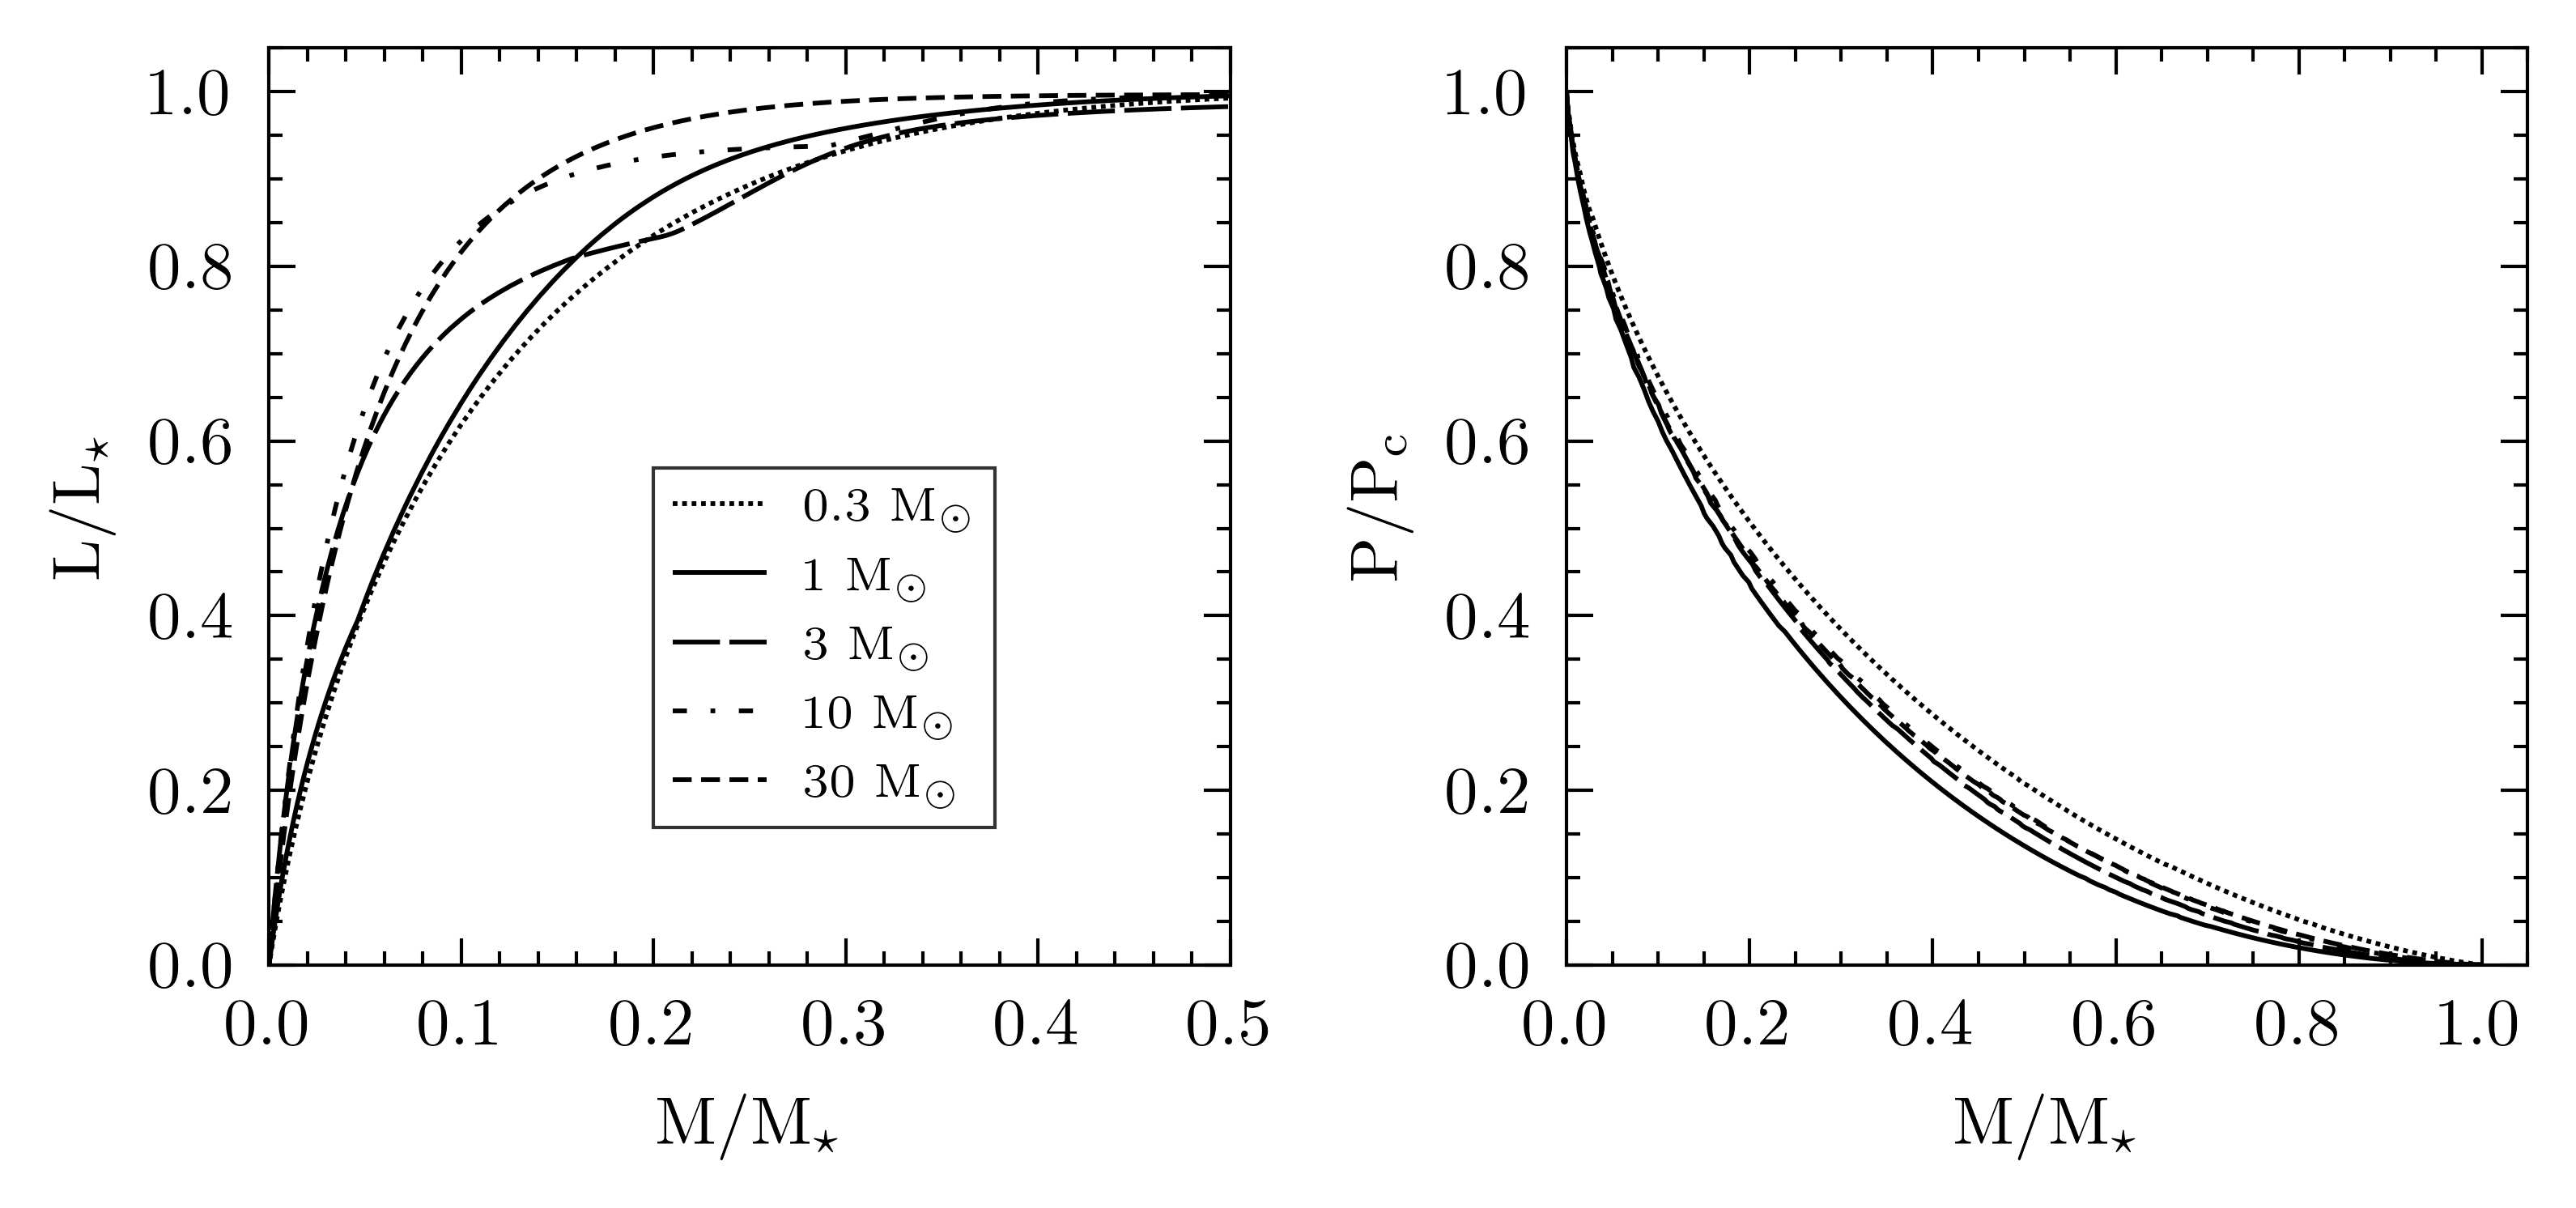

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0.35, hspace=0)

# Left Panel: L/Lstar vs M/Mstar

mMin = 0.0
mMax = 0.5
lMin = 0
lMax = 1.05

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(mMin,mMax)
ax1.set_xlabel(r'M/M$_\star$',fontsize=axisFontSize)
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.set_ylim(lMin,lMax)
ax1.set_ylabel(r'L/L$_\star$',fontsize=axisFontSize)
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))

for i,m in enumerate(massList):
    ax1.plot(mass[m],luminosity[m],ls=lineType[i],color='black',lw=0.7,label=rf'{m} M$_\odot$')

legend = ax1.legend(fontsize=labelFontSize,loc=(0.4,0.15),fancybox=False,edgecolor='black')
legend.get_frame().set_linewidth(0.5)

# Right Panel: P/Pc vs M/Mstar

mMin = 0.0
mMax = 1.05
pMin = 0.0
pMax = 1.05

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(mMin,mMax)
ax2.set_xlabel(r'M/M$_\star$',fontsize=axisFontSize)
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_ylim(pMin,pMax)
ax2.set_ylabel(r'P/P$_{\rm c}$',fontsize=axisFontSize)
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.05))

for i,m in enumerate(massList):
    ax2.plot(mass[m],pressure[m],ls=lineType[i],color='black',lw=0.7)
    
# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')